In [1]:
import numpy as np
import pandas as pd

In [7]:
m2 = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/merged_data.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,1,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,2,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [9]:
m2.shape

(671470, 44)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### 20대 여자

In [10]:
F_20 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==20)]
F_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
16,224.333333,7.700000e+04,1.0,219.000000,1259.000000,20,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,3.0
20,18.000000,1.100000e+06,1.0,67.000000,3155.000000,20,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
24,64.500000,9.595000e+04,1.0,64.000000,1488.000000,20,1,0,2,0.0,...,3,0,0,0.0,0.0,0,0,0.0,0.0,1.0
44,78.000000,4.500000e+04,1.0,92.000000,422.000000,20,1,0,0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
46,19.865385,1.140962e+04,1.0,19.326923,147.211538,20,1,0,17,0.0,...,0,0,0,0.0,52.0,0,0,0.0,0.0,0.0


In [11]:
F_20.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4',
       'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9'],
      dtype='object')

In [12]:
#대대분류 삭제
F_20_drop = F_20.drop(F_20.loc[:, F_20.columns.str.startswith('CLAC0')], axis = 1)
F_20_drop.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [13]:
mms = MinMaxScaler()
mms.fit(F_20_drop) #대대분류 뺀 column들만 갖고
F_20_transformed = mms.transform(F_20_drop)

In [73]:
Sum_of_squared_distances = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(F_20_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9


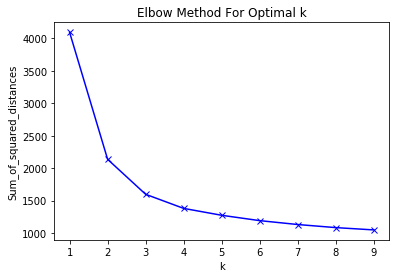

In [75]:
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
k=3

In [17]:
km = KMeans(n_clusters=k, algorithm='auto')
km.fit(F_20_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
m2.columns[:34]

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'weekend',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [19]:
F_20_transformed = pd.DataFrame(F_20_transformed)
F_20_transformed.columns = m2.columns[:34]
F_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,weekend,DVC_desktop,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.447351,0.024414,0.0,0.437751,0.092655,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.027523,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.038961
1,0.032193,0.349198,0.0,0.132530,0.232411,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.018349,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.025974
2,0.125755,0.030431,0.0,0.126506,0.109535,0.0,0.0,0.0,0.029851,0.0,...,0.0,0.0,0.036697,0.0,0.02,0.000000,0.040541,0.000000,0.000000,0.000000
3,0.152918,0.014255,0.0,0.182731,0.030959,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.04,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.035946,0.003591,0.0,0.036801,0.010704,0.0,0.0,0.0,0.253731,0.0,...,0.0,0.0,0.000000,0.0,0.16,0.176471,0.108108,0.090909,0.032258,0.090909


In [20]:
F_20_transformed['predict'] = km.predict(F_20_transformed)

In [23]:
F_20_transformed['predict'].value_counts()

1    55816
0    21483
2     4945
Name: predict, dtype: int64

In [120]:
F_20_transformed.index = F_20.index

## new data

In [24]:
import matplotlib.pyplot as pyplot

In [55]:
#clac0부터 순서대로
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [94]:
def clustering_index(k, new_data, data, transformed_data, category) :
    
    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    for kk in range(k) :
        sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
        idx=np.where(F_20_transformed['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        category_rate[kk] = clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()/sum_of_sum

    
    diatance_from_centers = [0] * k

    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]
    
    return sum(result)
    
    

In [97]:
import random

In [131]:
#random data generate
random_idx = F_20_transformed.index[random.randint(0,len(F_20_transformed))]
random_data = F_20_transformed.loc[random_idx, :"month_9"]
random_idx

220125

In [132]:
for i in range(10) :
    print(labels[i], clustering_index(3, random_data, F_20, F_20_transformed, i))

furniture 10.820291579328003
electronic 11.242725429386793
pet 10.964528455865034
sports 9.997844460850864
food 11.618034654304784
travel 13.260629239085674
baby 10.706308540497593
kitchen 10.614684294253918
fashion 9.369343575955977
beauty 11.056851375115766


In [133]:
F_20.loc[random_idx,'CLAC0_0':'CLAC0_9']

CLAC0_0    0.0
CLAC0_1    0.0
CLAC0_2    0.0
CLAC0_3    0.0
CLAC0_4    0.0
CLAC0_5    0.0
CLAC0_6    1.0
CLAC0_7    0.0
CLAC0_8    1.0
CLAC0_9    0.0
Name: 220125, dtype: float64